In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.base import clone
from cross_val import *
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import svm
import random

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
def plotNumbers(X, y, text = 'label: '):
    _, axes = plt.subplots(nrows=1, ncols=len(y), figsize=(10, 3))

    for ax, image, label in zip(axes, X, y):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(text + "%s" % str(label))


In [5]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [65]:
train_samples = 35000

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_samples, test_size=5000)

In [66]:
clf = svm.SVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

SVC(random_state=0, tol=1e-05)

In [67]:
Z = clf.predict(X_val)
accuracy = accuracy_score(y_val, Z)
print("Classifier performance %.4f" %  accuracy)

Classifier performance 0.9746


In [70]:
support_X = X_train[clf.support_]
support_y = y_train[clf.support_]

(8692,)


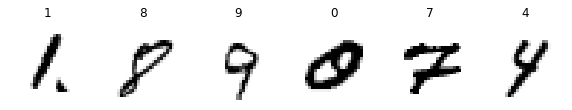

In [71]:
print(clf.support_.shape)
idx = np.random.randint(0, support_X.shape[0], 6)

plotNumbers(support_X[idx], support_y[idx], '')

In [ ]:
#cross-entropy loss
#L = -[y * log(S(wx + b)) + (1-y)*log(1 - S(wx+b))]

#θ_t+1 = θ_t - a * ∇L

#dL/dw_j = [S(wx _ b) - y] * x_j
